# Logistic Regression Model
In this notebook, we will use a logistic regression model trained on our labeled data to predict whether some test data contains suicidal ideology or not, then compare to the actual labels and measure our metrics.

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import utils as utils
import pickle

C:\Users\matth\AppData\Local\Temp\ipykernel_361420\994249391.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_path = '../data/train.csv'

In [5]:
# read in the data
df = pd.read_csv(train_path)
df.describe()

,text,label
count,45706,45706
unique,45631,5
top,FEARLESS FRIDAYS MEGA THREAD. Here we discuss ...,self.depression
freq,15,15714


In [5]:
# create tfidf vectorizer to convert text to vectors, save vectorizer to use in front end app
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['text'])
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf, file)

In [6]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [7]:
# train logistic regression model, save model to use in front end app
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [8]:
# evaluate model
y_pred = model.predict(X_test)

In [9]:
# function to get precision, recall, f1, and accuracy metrics
average_type = 'weighted'

def get_prfa(y_test, y_pred):
    precision = precision_score(y_test, y_pred, average=average_type)
    recall = recall_score(y_test, y_pred, average=average_type)
    f1 = f1_score(y_test, y_pred, average=average_type)
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

# print metrics
precision, recall, f1, accuracy = get_prfa(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.6797418587296911
Recall: 0.6663749726536863
F1 Score: 0.6676687415263957
Accuracy: 0.6663749726536863


In [20]:
# test model with sample sentence
sample_sentence = "i want to die."
sample_vector = tfidf.transform([sample_sentence])
prediction = model.predict(sample_vector)
print(f"Prediction for '{sample_sentence}': {prediction}")

Prediction for 'i want to die.': ['self.SuicideWatch']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [13]:
# train logistic regression model on different percentages of training data
model = LogisticRegression(max_iter=1000)
percentages = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# store metrics to plot
results = {'precision': [], 'recall': [], 'f1': [], 'accuracy': []}

for percent in percentages:
    # get subset of training data
    num_samples = int(X_train.shape[0] * percent)
    sub_X = X_train[:num_samples]
    sub_y = y_train[:num_samples]
    
    # train model and predict on test data
    model.fit(sub_X, sub_y)
    y_pred = model.predict(X_test)

    # get and store metrics
    precision, recall, f1, accuracy = get_prfa(y_test, y_pred)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1'].append(f1)
    results['accuracy'].append(accuracy)

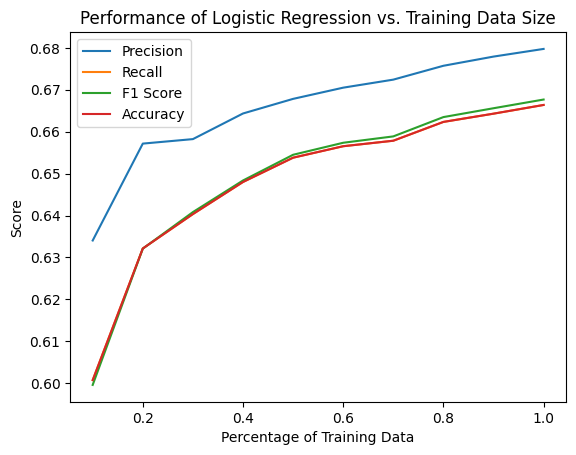

In [14]:
utils.create_graph(percentages, results, 'Logistic Regression', 'LR.png')